In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7)

In [57]:
def L2(X,Z):
    n, d = X.shape  # n = number of vectors in X
    m = Z.shape[0]  # m = number of vectors in Z

    # Gram matrix
    G = np.dot(X, Z.T)

    # S matrix: squared norms of X rows
    temp = np.sum(X**2, axis=1)
    S = np.repeat(temp, m, axis=0).reshape(n, m)

    # R matrix: squared norms of Z rows
    temp = np.sum(Z**2, axis=1).reshape(1, m)
    R = np.repeat(temp, n, axis=0)

    # Vectorized L2 distance
    D = S + R - 2*G
    return np.array(D)


In [58]:
def knn(xTr, xTe, k):
    distances = L2(xTr, xTe)
    D = np.sort(distances, axis=0)
    I = np.argsort(distances, axis=0)
    D = D[:k, :]
    I = I[:k, :]
    return np.array(I), np.array(D)

[[0.00341232 0.00314885 0.00108989]
 [0.00639677 0.00701385 0.00287223]
 [0.00993054 0.00712086 0.00556967]] [[72 45 19]
 [87 57 32]
 [91 82 90]]


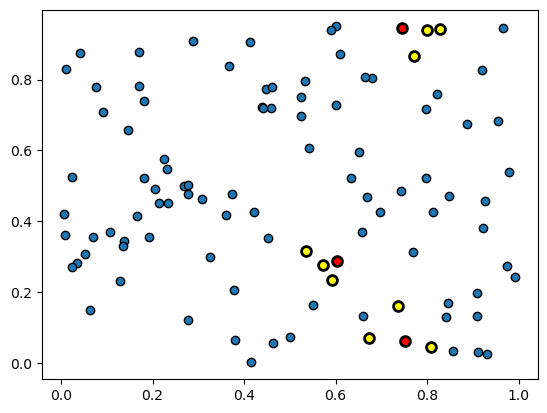

In [59]:
X = np.random.rand(100, 2)
X2 = np.random.rand(3, 2)
Y = np.random.randint(0, 3, 100)

idx, dist = knn(X, X2, 3)
print(dist, idx)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], edgecolors='black')
plt.scatter(X2[:, 0], X2[:, 1], c='red', marker='o', s=50, edgecolors='black', linewidths=2)
plt.scatter(X[idx, 0], X[idx, 1], c='yellow', marker='o', s=50, edgecolors='black', linewidths=2)
plt.show()

In [60]:
def accuracy(truth, preds):
    truth = np.array(truth)
    preds = np.array(preds)
    accur = None
    count = 0
    
    truth = truth.flatten()
    preds = preds.flatten()
    for i in range(len(truth)):
        if i > len(preds)-1:
            break
        if truth[i] == preds[i]:
            count += 1
    accur = count / len(truth)
    return accur

accuracy([1,2,3,4], [1,2,3,0])

0.75

In [61]:
k = 3
def knnclassifier(xTr, yTr, xTe, k):
    preds = None
    yTr = yTr.flatten()

    idx, dist = knn(xTr, xTe, k)
    temp = yTr[idx]
    temp = np.mean(temp, axis=0)
    preds = np.round(temp)
    return np.array(preds)


X = np.random.rand(100, 2)
X2 = np.random.rand(3, 2)
Y = np.random.randint(0, 2, 100)

preds = knnclassifier(X, Y, X2, k)
results = accuracy(Y, preds)
print(results)
print(preds)

0.01
[1. 1. 0.]
